# Generate pretty plots for aDDM models

In [67]:
import glam
import pandas as pd
import numpy as np
import os.path

import matplotlib.pyplot as plt

In [68]:
import pymc3 as pm

In [69]:
np.random.seed(23) # from random.org

In [70]:
def genGazeRatio(trial_data,fixations_data):
    partNums = trial_data.parcode.unique()
    IAFixMatrix = []
    for i in partNums:
        
        PartIAFixMatrix= fixations_data.loc[fixations_data['parcode'] == i]
       
        trialNums = pd.unique(PartIAFixMatrix['trial'])
        for j in trialNums:
            PartTrialIAFixMatrix= PartIAFixMatrix.loc[(PartIAFixMatrix['trial'] == j )]
            # considering that IA 1 is left and IA 2 is right (IAs 3 and 0 are not fixated in the item)
                        
            # Sum left item
            LGazeTime = PartTrialIAFixMatrix.loc[PartTrialIAFixMatrix['fix_item'] == 1, 'fix_time'].sum() 
            # Sum right item
            RGazeTime = PartTrialIAFixMatrix.loc[PartTrialIAFixMatrix['fix_item'] == 2, 'fix_time'].sum()  
            
            LGaze = LGazeTime/(LGazeTime + RGazeTime)
            RGaze = RGazeTime/(LGazeTime + RGazeTime)
            
            IAFixMatrix.append([LGaze, RGaze]) 
   #     print ('finish part ' + str(i))
    
    IAFixDataFrame = pd.DataFrame(IAFixMatrix,columns=['gaze_0','gaze_1'])
    GLAM_output = pd.concat([trial_data, IAFixDataFrame], axis = 1)
    
    return GLAM_output

# MORE frame 

In [71]:
#MORE
simulation_data1 = pd.read_csv('aDDM_simulation_data/More/simul_expdata_aDDMMore.csv')
simulation_fix1 = pd.read_csv('aDDM_simulation_data/More/simul_fixations_aDDMMore.csv')

human_data1 = pd.read_csv('aDDM_simulation_data/More/aDDM_Data_PF2019_More_YesBin_33.csv')
human_fix1 = pd.read_csv('aDDM_simulation_data/More/aDDM_Fix_PF2019_More_NoBin_33.csv')

In [72]:
# save

if os.path.exists('aDDM_simulation_data/More/predictions_aDDM_more_GLAMformat.csv'):  
        aDDM_prediction = pd.read_csv('aDDM_simulation_data/More/predictions_aDDM_more_GLAMformat.csv')
        print('Loaded old file')
else:
        aDDM_prediction = genGazeRatio(simulation_data1,simulation_fix1)
        aDDM_prediction.to_csv('aDDM_simulation_data/More/predictions_aDDM_more_GLAMformat.csv')

Loaded old file


In [73]:
aDDM_human = genGazeRatio(human_data1,human_fix1)

In [74]:
# Change names of cols
aDDM_prediction = aDDM_prediction.rename(index=str, columns={ 'parcode':'subject' ,"item_left": "item_value_0", "item_right": "item_value_1"})
aDDM_human = aDDM_human.rename(index=str, columns={ 'parcode':'subject' ,"item_left": "item_value_0", "item_right": "item_value_1"})

## Picking only odd trials for humans

In [75]:
aDDM_human_even = aDDM_human.iloc[np.arange(0, len(aDDM_human), 2)].copy()

Close Figure to continue...


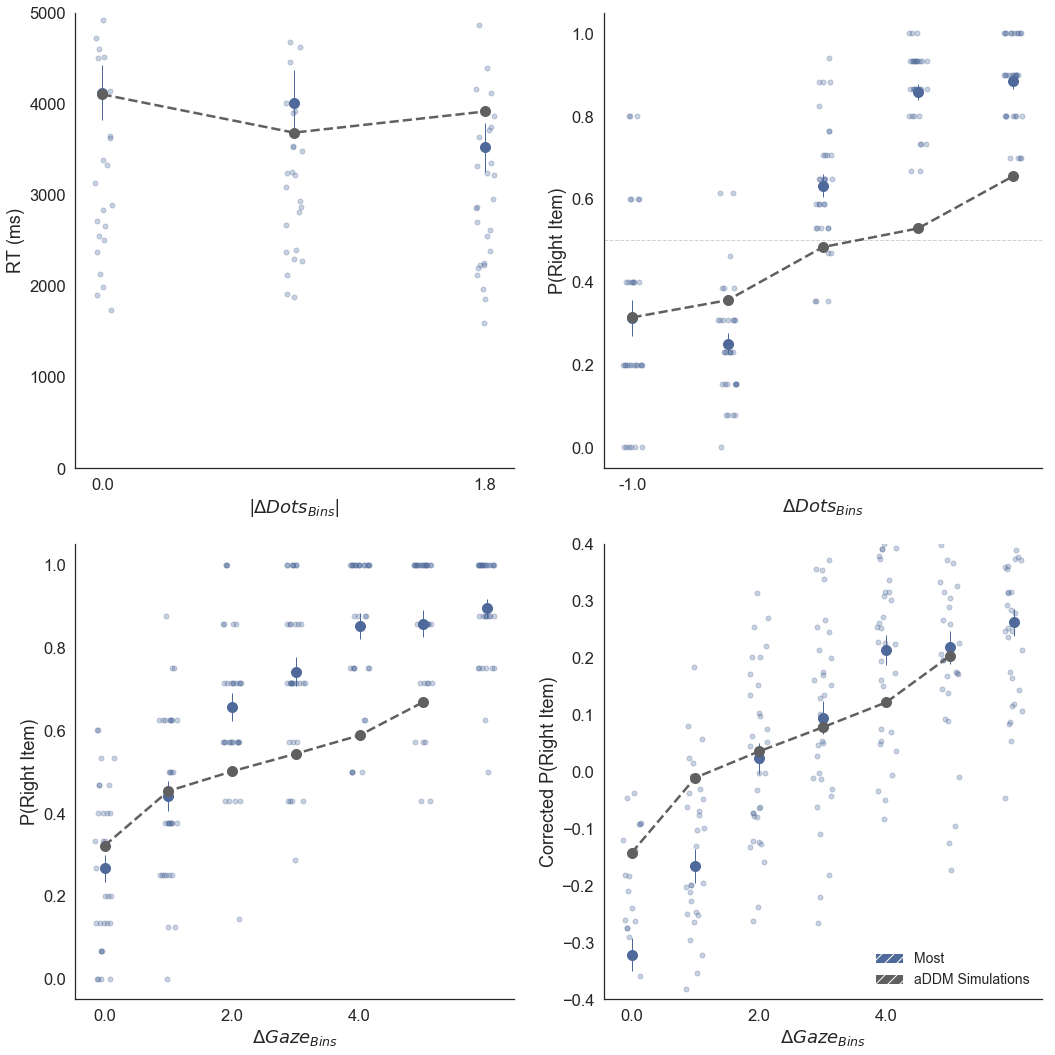

In [76]:
print('Close Figure to continue...')
glam.plots_pretty_aDDM.plot_fit(aDDM_human_even, [aDDM_prediction], color_data = '#4F6A9A',label1 = 'Most');

plt.savefig(str('SavedFigures/PF2019aDDM_simulations_More.png'), dpi = 200 )
plt.show()



## We observe low differences in $ΔDots_{Bins}$ because:

1. We are bining the value data
2. In the original data the differences are small in comparison with the total number of dots
3. when we bin the differences are compressed to only these 3 levels

---------------------------------------------------------
# LESS frame 

In [77]:
#LESS
simulation_data2 = pd.read_csv('aDDM_simulation_data/Less/simul_expdata_aDDMLess.csv')
simulation_fix2 = pd.read_csv('aDDM_simulation_data/Less/simul_fixations_aDDMLess.csv')

human_data2 = pd.read_csv('aDDM_simulation_data/Less/aDDM_Data_PF2019_Less_YesBin_33.csv')
human_fix2 = pd.read_csv('aDDM_simulation_data/Less/aDDM_Fix_PF2019_Less_NoBin_33.csv')

In [78]:
# save

if os.path.exists('aDDM_simulation_data/Less/predictions_aDDM_less_GLAMformat.csv'):  
        aDDM_prediction = pd.read_csv('aDDM_simulation_data/Less/predictions_aDDM_less_GLAMformat.csv')
        print('Loaded old file')
else:
        aDDM_prediction = genGazeRatio(simulation_data2,simulation_fix2)
        aDDM_prediction.to_csv('aDDM_simulation_data/Less/predictions_aDDM_less_GLAMformat.csv')

Loaded old file


In [79]:
aDDM_human = genGazeRatio(human_data2,human_fix2)

In [80]:
# CHnage names of cols
aDDM_prediction = aDDM_prediction.rename(index=str, columns={ 'parcode':'subject' ,"item_left": "item_value_0", "item_right": "item_value_1"})
aDDM_human = aDDM_human.rename(index=str, columns={ 'parcode':'subject' ,"item_left": "item_value_0", "item_right": "item_value_1"})

## Picking only odd trials for humans

In [81]:
aDDM_human_even = aDDM_human.iloc[np.arange(0, len(aDDM_human), 2)].copy()

Close Figure to continue...


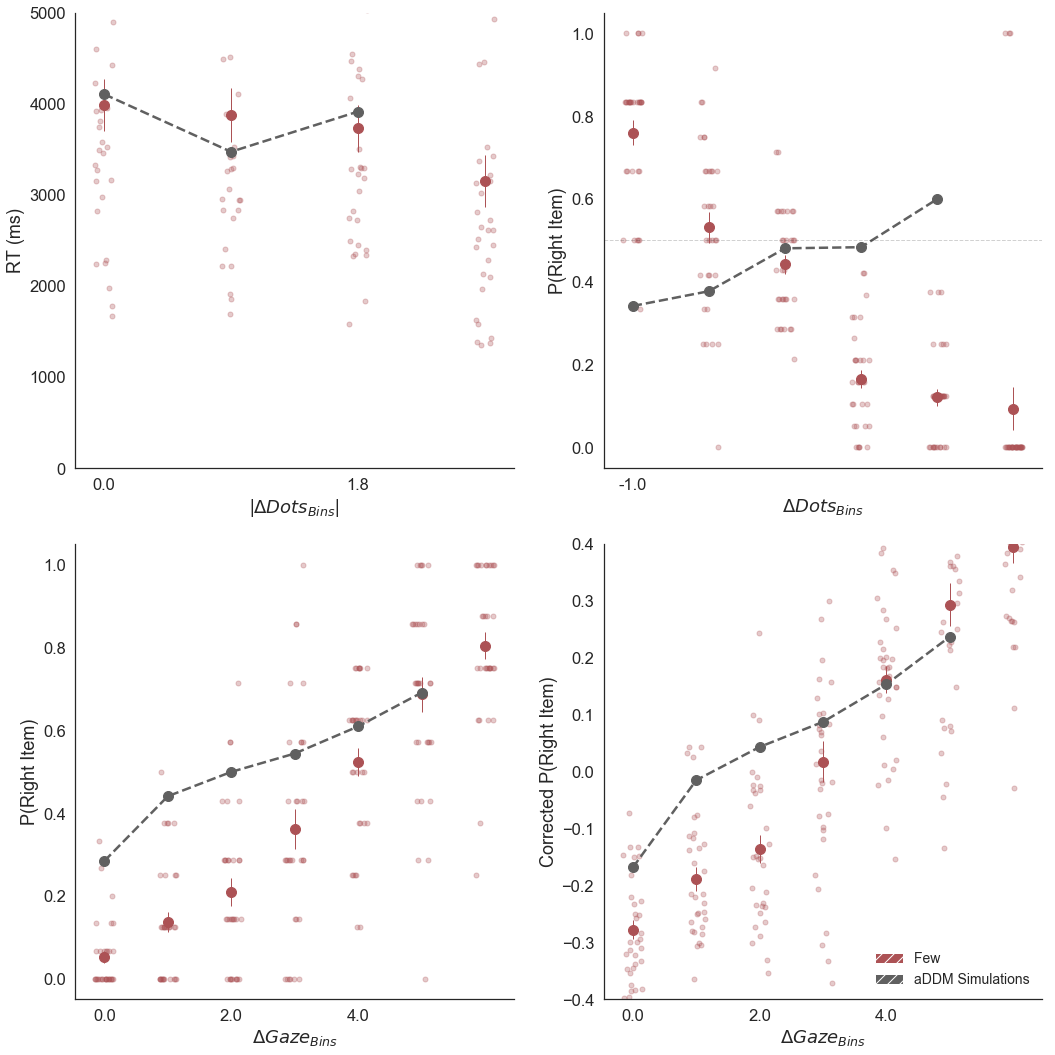

In [82]:
print('Close Figure to continue...')
glam.plots_pretty_aDDM.plot_fit(aDDM_human_even, [aDDM_prediction], color_data = '#AC5255',label1 = 'Few ');
plt.savefig(str('SavedFigures/PF2019aDDM_simulations_Less.png'), dpi = 200 )

plt.show()


---------------------------------------------------------
# LESS frame Inverted

In [83]:
#LESS
simulation_data3 = pd.read_csv('aDDM_simulation_data/LessInv/simul_expdata_aDDMLessInv.csv')
simulation_fix3 = pd.read_csv('aDDM_simulation_data/LessInv/simul_fixations_aDDMLessInv.csv')

human_data3 = pd.read_csv('aDDM_simulation_data/LessInv/aDDM_Data_PF2019_Less_YesBin_33_Inv.csv')
human_fix3 = pd.read_csv('aDDM_simulation_data/LessInv/aDDM_Fix_PF2019_Less_NoBin_33.csv')

In [84]:
# save

if os.path.exists('aDDM_simulation_data/LessInv/predictions_aDDM_lessInv_GLAMformat.csv'):  
        aDDM_prediction = pd.read_csv('aDDM_simulation_data/LessInv/predictions_aDDM_lessInv_GLAMformat.csv')
        print('Loaded old file')
else:
        aDDM_prediction = genGazeRatio(simulation_data3,simulation_fix3)
        aDDM_prediction.to_csv('aDDM_simulation_data/LessInv/predictions_aDDM_lessInv_GLAMformat.csv')

Loaded old file


In [85]:
aDDM_human = genGazeRatio(human_data3,human_fix3)

In [86]:
# CHnage names of cols
aDDM_prediction = aDDM_prediction.rename(index=str, columns={ 'parcode':'subject' ,"item_left": "item_value_0", "item_right": "item_value_1"})
aDDM_human = aDDM_human.rename(index=str, columns={ 'parcode':'subject' ,"item_left": "item_value_0", "item_right": "item_value_1"})

## Picking only odd trials for humans

In [87]:
aDDM_human_even = aDDM_human.iloc[np.arange(0, len(aDDM_human), 2)].copy()

Close Figure to continue...


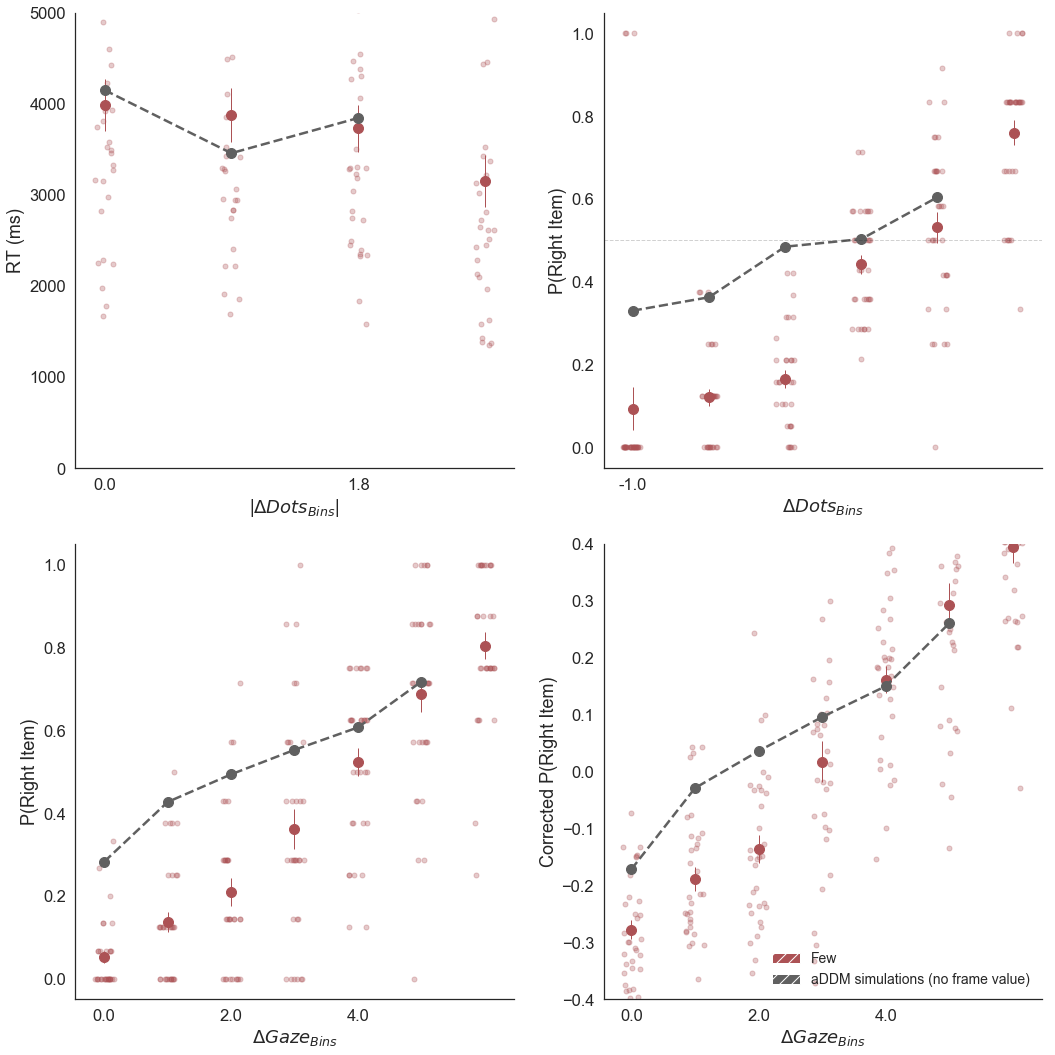

In [88]:
print('Close Figure to continue...')
glam.plots_pretty_aDDM.plot_fit(aDDM_human_even, [aDDM_prediction], color_data = '#AC5255',label1 = 'Few', label2 = 'aDDM simulations (no frame value)');
plt.savefig(str('SavedFigures/PF2019aDDM_simulations_LessInv.png'), dpi = 200 )

plt.show()


## REMEMBER THIS CASE IS NEGATIVE DELTA VALUE BECAUSE IT IS THE INVERTED CASE